# Imports and Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/United Airlines Hackathon')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
calls = pd.read_csv('calls.csv')
cust = pd.read_csv('customers.csv')
reason = pd.read_csv('reason.csv')
sentiment = pd.read_csv('sentiment_statistics.csv')
test = pd.read_csv('test.csv')

data = {'Calls': calls, 'Customer': cust, 'Reason': reason, 'Sentiment Statistics': sentiment, 'Test': test}

In [ ]:
for k,v in data.items():
  print(k)
  display(v.head(3))
  print(v.shape)
  print('\n')
  print('-'*220)
  print('\n')

Calls


,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...


(71810, 7)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Customer


,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN


(71810, 3)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Reason


,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS


(66653, 2)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Sentiment Statistics


,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32


(71810, 6)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Test


,call_id
0,7732610078
1,2400299738
2,6533095063


(5157, 1)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




* `Calls`, `Customer`, `Sentiment Statistics` have same number of rows while `Reason` have lesser number of rows.

# EDA

In [ ]:
for k, v in data.items():
    print(k)
    missing_percentage = round((v.isna().sum() / v.shape[0])*100, 2)
    missing_percentage_df = pd.DataFrame(missing_percentage, columns=["% of missing values"])
    display(missing_percentage_df)
    plt.show()
    print('\n')
    print('-'*220)
    print('\n')

Calls


,% of missing values
call_id,0.0
customer_id,0.0
agent_id,0.0
call_start_datetime,0.0
agent_assigned_datetime,0.0
call_end_datetime,0.0
call_transcript,0.0
call_duration,0.0




----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Customer


,% of missing values
customer_id,0.00
customer_name,0.00
elite_level_code,35.88




----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Reason


,% of missing values
call_id,0.0
primary_call_reason,0.0




----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Sentiment Statistics


,% of missing values
call_id,0.00
agent_id,0.00
agent_tone,0.30
customer_tone,0.00
average_sentiment,0.15
silence_percent_average,0.00




----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Test


,% of missing values
call_id,0.0




----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




* Here we have `<5%` missing values for almost all columns except for the `elite_level_code` in `Customer` dataset which have `35%` missing values.



In [ ]:
# Convert the columns to datetime objects
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'], format="%m/%d/%Y %H:%M")
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'], format="%m/%d/%Y %H:%M")

# Add call_duration column to the dataset.
calls['call_duration'] = (calls['call_end_datetime'] - calls['call_start_datetime']).dt.total_seconds() // 60

* After fixing the format of `call_start_datetime` and `call_end_datetime`, we can find the duration of calls.

In [ ]:
fig = px.histogram(calls, x = "call_duration", marginal="box")
fig.show()

* Avg `call_duration` between a Customer and an Agent is around `12 to 13 mins`, Overall distribution have positive skewness.

In [ ]:
joined_data = pd.merge(calls, cust, on='customer_id', how='inner')
joined_data = pd.merge(joined_data, sentiment, on = 'call_id', how='inner')

#drop extra 'agent_id_y' col and rename agent_id_x back to agent_id
joined_data = joined_data.drop(columns = ['agent_id_y'])
joined_data = joined_data.rename(columns = {'agent_id_x' : 'agent_id'})
joined_data.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,38.0,Matthew Foster,4.0,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,15.0,Tammy Walters,NaN,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,27.0,Jeffery Dixon,NaN,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,8/1/2024 0:10,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,12.0,David Wilkins,2.0,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,8/1/2024 0:14,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,19.0,Elizabeth Daniels,0.0,neutral,polite,-0.05,0.35


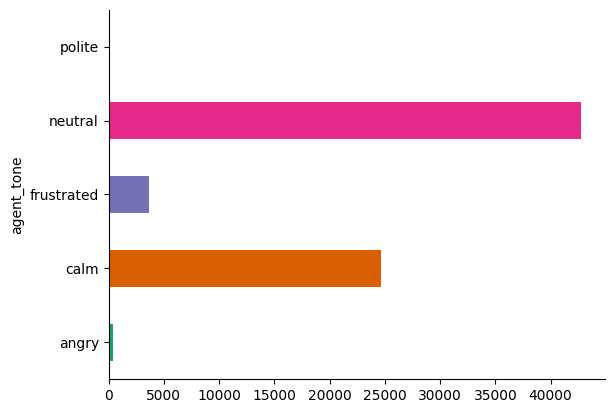

In [ ]:
joined_data.groupby('agent_tone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

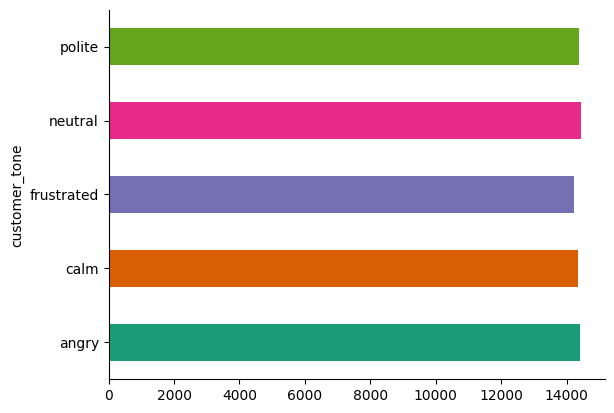

In [ ]:
joined_data.groupby('customer_tone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

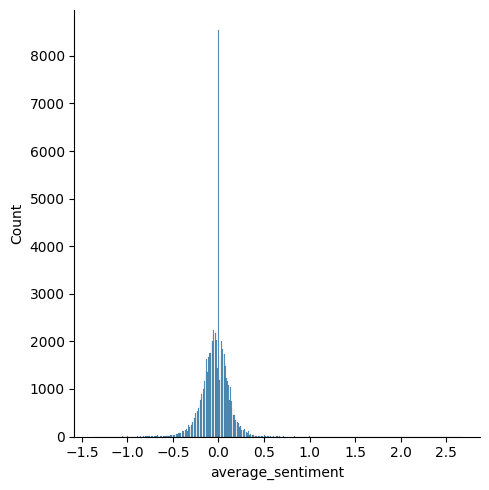

In [ ]:
sns.displot(joined_data, x = "average_sentiment")

In [ ]:
import plotly.graph_objects as go
avg_sentiment_and_avg_silence = joined_data[['average_sentiment', 'silence_percent_average']]

fig = go.Figure()
fig.add_trace(go.Box(x = avg_sentiment_and_avg_silence['average_sentiment'], name = 'Avg Sentiment of Customer'))
fig.add_trace(go.Box(x = avg_sentiment_and_avg_silence['silence_percent_average'], name = 'Avg Silence % in the call.'))

fig.show()